In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mpl_finance as mplf
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

In [2]:
Stock_ETF = pd.read_csv('ETF/data/510180.csv')
Stock_ETF = Stock_ETF.set_index('date')
Stock_ETF.index = pd.to_datetime(Stock_ETF.index)
Stock_ETF = Stock_ETF.sort_index(axis=0, ascending=True)

In [3]:
import Risk_Ratio_Functions

In [4]:
Risk_Ratio = Risk_Ratio_Functions.Risk_Ratio(Stock_ETF)
Risk_Ratio = Risk_Ratio[['Decision','MAJCQX']]
Stock_ETF_Risk_Ratio = pd.concat([Stock_ETF,Risk_Ratio], axis=1)
Stock_ETF_Risk_Ratio.head()

,open,high,low,close,volume,amount,Decision,MAJCQX
date,,,,,,,,
2006-05-18,0.801,0.825,0.786,0.809,82909008,24748.268,48.96,NaN
2006-05-19,0.802,0.879,0.802,0.844,50558592,15555.816,58.48,NaN
2006-05-22,0.845,0.869,0.833,0.854,33741688,10556.232,58.48,55.306667
2006-05-23,0.825,0.867,0.797,0.804,28874040,8767.081,42.16,53.040000
2006-05-24,0.807,0.826,0.777,0.788,22789500,6825.586,38.08,46.240000


In [5]:
stadate = '2018-03-25'
enddate = '2018-06-08'
Stock_ETF_Risk_Ratio = Stock_ETF_Risk_Ratio[Stock_ETF_Risk_Ratio.index >= pd.to_datetime(stadate)]
Stock_ETF_Risk_Ratio = Stock_ETF_Risk_Ratio[Stock_ETF_Risk_Ratio.index <= pd.to_datetime(enddate)]
k = len(Stock_ETF_Risk_Ratio)

In [6]:
'''
Stock_ETF_Risk_Ratio['id'] = 0
for i in range(1,k,1):
    Stock_ETF_Risk_Ratio.loc[i:i+1,'id'] = i
'''

"\nStock_ETF_Risk_Ratio['id'] = 0\nfor i in range(1,k,1):\n    Stock_ETF_Risk_Ratio.loc[i:i+1,'id'] = i\n"

In [7]:
Stock_ETF_Risk_Ratio['date'] = Stock_ETF_Risk_Ratio.index
Stock_ETF_Risk_Ratio = Stock_ETF_Risk_Ratio.reset_index(drop=True)
Stock_ETF_Risk_Ratio['id'] = Stock_ETF_Risk_Ratio.index+1

In [8]:
Stock_ETF_Risk_Ratio.tail(10)

,open,high,low,close,volume,amount,Decision,MAJCQX,date,id
41,3.266,3.285,3.249,3.274,7998700,2614.048,34,25.840000,2018-05-28,42
42,3.270,3.278,3.242,3.258,9865550,3217.000,21.76,26.293333,2018-05-29,43
43,3.220,3.230,3.192,3.192,11710300,3755.888,19.04,24.933333,2018-05-30,44
44,3.196,3.248,3.196,3.244,6517150,2105.055,27.2,22.666667,2018-05-31,45
45,3.238,3.252,3.215,3.227,7100349,2295.381,31.28,25.840000,2018-06-01,46
46,3.235,3.263,3.232,3.257,8117125,2639.724,36.72,31.733333,2018-06-04,47
47,3.268,3.283,3.247,3.280,11931013,3891.310,48.96,38.986667,2018-06-05,48
48,3.273,3.282,3.268,3.274,8517098,2790.559,50.32,45.333333,2018-06-06,49
49,3.280,3.305,3.280,3.283,10534165,3466.384,58.48,52.586667,2018-06-07,50
50,3.272,3.273,3.227,3.240,8096775,2627.235,36.72,48.506667,2018-06-08,51


In [9]:
Trade_ETF = pd.read_csv('ETF/data/180trade.csv')
Trade_ETF['date'] = pd.to_datetime(Trade_ETF['date'])
Trade_ETF

,date,trade,price
0,2018-02-09,buy,3.303
1,2018-02-22,sell,3.475
2,2018-03-26,buy,3.287
3,2018-04-11,sell,3.348
4,2018-04-17,buy,3.246
5,2018-05-08,sell,3.300
6,2018-04-18,buy,3.199
7,2018-05-08,sell,3.300
8,2018-05-30,buy,3.221
9,2018-06-07,sell,3.303


In [10]:
Stock_ETF_Risk_Ratio_trade = pd.merge(Stock_ETF_Risk_Ratio, Trade_ETF, how='right', on=['date'])
Stock_ETF_Risk_Ratio_trade = Stock_ETF_Risk_Ratio_trade.dropna()
Stock_ETF_Risk_Ratio_trade

,open,high,low,close,volume,amount,Decision,MAJCQX,date,id,trade,price
0,3.322,3.325,3.272,3.307,10590350.0,3492.433,13.6,22.213333,2018-03-26,1.0,buy,3.287
1,3.366,3.374,3.343,3.360,12422626.0,4176.494,55.76,47.600000,2018-04-11,11.0,sell,3.348
2,3.246,3.257,3.196,3.200,7471200.0,2415.292,20.4,31.280000,2018-04-17,15.0,buy,3.246
3,3.217,3.228,3.176,3.216,8890469.0,2847.781,21.76,25.386667,2018-04-18,16.0,buy,3.199
4,3.262,3.317,3.258,3.304,11157907.0,3678.386,63.92,52.586667,2018-05-08,28.0,sell,3.300
5,3.262,3.317,3.258,3.304,11157907.0,3678.386,63.92,52.586667,2018-05-08,28.0,sell,3.300
6,3.220,3.230,3.192,3.192,11710300.0,3755.888,19.04,24.933333,2018-05-30,44.0,buy,3.221
7,3.280,3.305,3.280,3.283,10534165.0,3466.384,58.48,52.586667,2018-06-07,50.0,sell,3.303


In [11]:
trades = Stock_ETF_Risk_Ratio_trade['price'].values
idt = Stock_ETF_Risk_Ratio_trade['id'].values

In [12]:
Stock_ETF_Risk_Ratio_trade_buy = Stock_ETF_Risk_Ratio_trade.loc[Stock_ETF_Risk_Ratio_trade['trade']=='buy',['id','price']]
buy = Stock_ETF_Risk_Ratio_trade_buy['price'].values
idb = Stock_ETF_Risk_Ratio_trade_buy['id'].values

In [13]:
Stock_ETF_Risk_Ratio_trade_sell = Stock_ETF_Risk_Ratio_trade.loc[Stock_ETF_Risk_Ratio_trade['trade']=='sell',['id','price']]
sell = Stock_ETF_Risk_Ratio_trade_sell['price'].values
ids = Stock_ETF_Risk_Ratio_trade_sell['id'].values

In [14]:
ids

array([ 11.,  28.,  28.,  50.])

In [15]:
sell

array([ 3.348,  3.3  ,  3.3  ,  3.303])

In [16]:
Stock_ETF_Risk_Ratio_ochl = Stock_ETF_Risk_Ratio[['id','open','close','high','low']]
Stock_ETF_Risk_Ratio_date = Stock_ETF_Risk_Ratio.set_index('date')

In [17]:
datarray = Stock_ETF_Risk_Ratio_ochl.values
De = Stock_ETF_Risk_Ratio['Decision'].values
JCQX = Stock_ETF_Risk_Ratio['MAJCQX'].values
Id = Stock_ETF_Risk_Ratio['id'].values
idx = np.arange(0, k, 1)
date = Stock_ETF_Risk_Ratio_date.index[idx].date

In [18]:
plt.figure(2,figsize=(14,6), dpi=80)
ax1 = plt.subplot(111)

In [19]:
mplf.candlestick_ochl(ax1, datarray, width=0.8, colorup='red', colordown='green', alpha=0.5)
plt.grid(linestyle=':', alpha=0.5)

In [20]:
# zorder设置叠加顺序，未设置这个参数的则在最底层
plt.scatter(idb, buy, color ='red', s=50, alpha=1.0, zorder=2, label='buy point')
plt.scatter(ids, sell, color ='blue', s=50, alpha=1.0, zorder=3, label='sell point')
plt.legend(prop={'family':'Microsoft YaHei','size':12}, loc=(0.85,0.87))

In [21]:
for a,b in zip(ids,sell):
    ax1.text(a, b+0.01, b, ha='center', va= 'center', bbox = dict(facecolor = "blue", alpha = 0.2))

In [22]:
for c,d in zip(idb,buy):
    ax1.text(c, d-0.015, d, ha='center', va= 'center', bbox = dict(facecolor = "magenta", alpha = 0.2))

In [23]:
for m,n,p,q in zip(idb,ids,buy,sell):
    ax1.add_line(Line2D((m,n), (p,q), linewidth=3, color='magenta', zorder=1))

In [24]:
plt.xticks(idx, date)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

In [25]:
ax2 = ax1.twinx()
plt.plot(Id, De, color ='orange', linewidth=2.0, alpha=1.0, label='Decision')
plt.plot(Id, JCQX, color ='brown', linewidth=2.0, alpha=1.0, label='MAJCQX')
plt.axhline(y=20, color='cyan', linewidth=1.0, alpha=1.0)
plt.axhline(y=60, color='yellow', linewidth=1.0, alpha=1.0)
plt.axhline(y=70, color='gold', linewidth=1.0, alpha=1.0)
plt.legend(prop={'family':'Microsoft YaHei','size':12}, loc=(0.72,0.87))

In [26]:
plt.xlim(0,k+1,1)
plt.ylim(10,80,10)

(10, 80)

In [27]:
Yahei = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\msyh.ttf')
plt.title('510180 Transaction Situation', fontproperties=Yahei, fontsize=17)

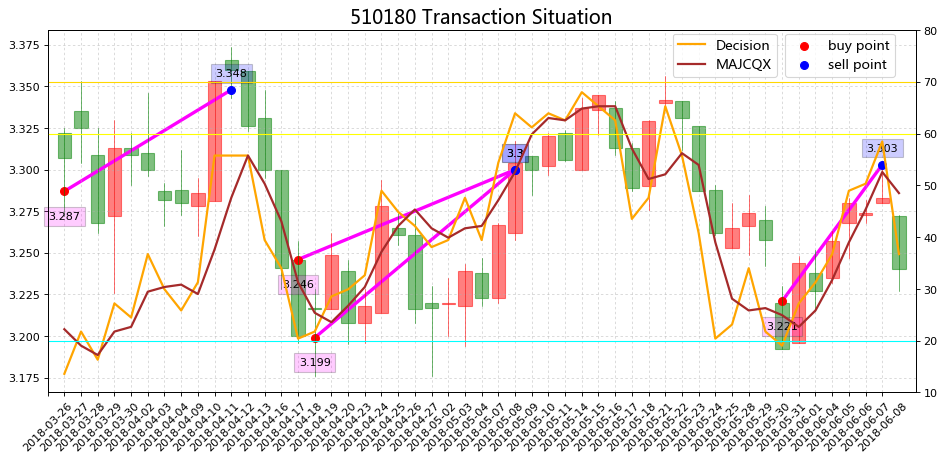

In [28]:
plt.show()